##
##CIFAR-10 Image Classification

In [0]:
%tensorflow_version 2.x

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [0]:
model = Sequential()
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                  filters = 10,
                  kernel_size = (3, 3),
                  strides = (1, 1),
                  padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                  filters = 10,
                  kernel_size = (3, 3),
                  strides = (1, 1),
                  padding = 'valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                  filters = 10,
                  kernel_size = (3, 3),
                  strides = (1, 1),
                  padding = 'valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 10)        280       
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 10)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 10)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 15, 15, 10)        40        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 10)        910       
_________________________________________________________________
activation_17 (Activation)   (None, 13, 13, 10)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 10)      

In [0]:
adam = optimizers.Adam(lr = 0.001)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = 64, 
                    validation_split = 0.2, 
                    epochs = 100, 
                    verbose = 1,
                    shuffle = True)

Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 1.4796 - accuracy: 0.4728 - val_loss: 1.5914 - val_accuracy: 0.4604
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 1.1009 - accuracy: 0.6086 - val_loss: 1.2492 - val_accuracy: 0.5702
Epoch 3/100
625/625 [==============================] - 2s 4ms/step - loss: 0.9008 - accuracy: 0.6840 - val_loss: 1.1975 - val_accuracy: 0.5910
Epoch 4/100
625/625 [==============================] - 2s 4ms/step - loss: 0.7187 - accuracy: 0.7478 - val_loss: 1.2780 - val_accuracy: 0.5844
Epoch 5/100
625/625 [==============================] - 2s 4ms/step - loss: 0.5452 - accuracy: 0.8097 - val_loss: 1.6240 - val_accuracy: 0.5349
Epoch 6/100
625/625 [==============================] - 3s 4ms/step - loss: 0.3922 - accuracy: 0.8631 - val_loss: 1.5122 - val_accuracy: 0.5922
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 0.2711 - accuracy: 0.9055 - val_loss: 1.6528 - val_accuracy: 0.5853

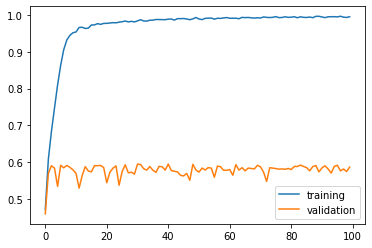

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()


In [0]:
results = model.evaluate(x_test, y_test)
print("Accuracy: ", results[1])

313/313 [==============================] - 1s 3ms/step - loss: 4.2402 - accuracy: 0.5901
Accuracy:  0.5900999903678894
